In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data dir

In [2]:
DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "Data")
DATA_DIR = os.path.join(DATA_DIR, "EEG4")
FIGURES_DIR = os.path.join("Figures", "DATS")

# Functions for Plotting

In [37]:
def one_scale(ax1, index1, index2, index3, data1, data2, data3, name1, name2, name3, y_label):

    lns1 = ax1.plot(index1, data1, color='b', linestyle = '--')
    lns2 = ax1.plot(index2, data2, color='r')
    lns3 = ax1.plot(index3, data3, color='g')
       
    lns = lns1 + lns2 + lns3
        
    ax1.legend(lns, [name1,name2,name3], loc='best')

    ax1.set_xticklabels([])
    
    #ax1.set_ylim(data_min, data_max)
    ax1.set_ylabel(y_label)
    
    for t in ax1.get_yticklabels():
        t.set_color('black')
        
    return ax1

In [4]:
def plot_metric(df_low, df_high, df_medium, metric, fig_name, title=""):
    
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams.update({'font.size': 22})
    
    ax = plt.subplot(1, 1, 1)
    ax1 = one_scale(ax, df_low.index, df_high.index, df_medium.index, df_low[metric], df_high[metric], df_medium[metric],
                         'low', 'high', 'medium', metric)

    plt.title(title)
    plt.tight_layout()
    
    plt.savefig(os.path.join(FIGURES_DIR, fig_name + '.png'))

# Read data

In [5]:
df_low_all = pd.DataFrame()
df_high_all = pd.DataFrame()
df_medium_all = pd.DataFrame()

In [6]:
run_dict = {
    # index - low(0), medium(1), high(2) scenarios
    # value - run number
    'MO':[1, 2, 3],
    'EI':[3, 2, 1],
    'KV':[3, 2, 1],
    'UO':[1, 2, 3],
    'KB':[1, 3, 2],
    'PF':[2, 3, 1],
    'AL':[3, 1, 2],
    'IH':[1, 3, 2],
    'RI':[2, 1, 3],
    'JO':[2, 3, 1],
    'AE':[3, 1, 2],
    'HC':[2, 1, 3],
    'LS':[3, 1, 2],
    'ML':[1, 3, 2],
    'AP':[1, 3, 2],
    'AK':[3, 1, 2],
    'RE':[2, 3, 1],
    'SV':[3, 2, 1]
    }

In [36]:
filename = os.path.join(DATA_DIR, "EEG_all_60.csv")
df_all = pd.read_csv(filename, sep=' ')

for key in run_dict:
    low_run = run_dict[key][0]
    high_run = run_dict[key][2]
    medium_run = run_dict[key][1]
    
    df_atco = df_all[df_all['ATCO']==key]    

    df_high = df_atco[df_atco['Run']==high_run]
    df_low = df_atco[df_atco['Run']==low_run]
    df_medium = df_atco[df_atco['Run']==medium_run]
    
    df_low_all = pd.concat([df_low_all, df_low])
    df_high_all = pd.concat([df_high_all, df_high])
    df_medium_all = pd.concat([df_medium_all, df_medium])

In [11]:
#fill the null rows with the mean of respective columns
df_low_all['WorkloadMean'] = df_low_all['WorkloadMean'].fillna(df_low_all['WorkloadMean'].mean())
df_low_all['VigilanceMean'] = df_low_all['VigilanceMean'].fillna(df_low_all['VigilanceMean'].mean())
df_low_all['StressMean'] = df_low_all['StressMean'].fillna(df_low_all['StressMean'].mean())
df_high_all['WorkloadMean'] = df_high_all['WorkloadMean'].fillna(df_high_all['WorkloadMean'].mean())
df_high_all['VigilanceMean'] = df_high_all['VigilanceMean'].fillna(df_high_all['VigilanceMean'].mean())
df_high_all['StressMean'] = df_high_all['StressMean'].fillna(df_high_all['StressMean'].mean())
df_medium_all['WorkloadMean'] = df_medium_all['WorkloadMean'].fillna(df_medium_all['WorkloadMean'].mean())
df_medium_all['VigilanceMean'] = df_medium_all['VigilanceMean'].fillna(df_medium_all['VigilanceMean'].mean())
df_medium_all['StressMean'] = df_medium_all['StressMean'].fillna(df_medium_all['StressMean'].mean())

In [33]:
number_of_rows = 35 # shortest run in minutes
df_low_mean = pd.DataFrame(columns=['WorkloadMean', 'VigilanceMean', 'StressMean'])
df_high_mean = pd.DataFrame(columns=['WorkloadMean', 'VigilanceMean', 'StressMean'])
df_medium_mean = pd.DataFrame(columns=['WorkloadMean', 'VigilanceMean', 'StressMean'])
for row in range(0, number_of_rows):
    df_row = df_low_all[df_low_all['timeInterval']==row+1]
    WL_mean = df_row.loc[:, 'WorkloadMean'].mean()
    Vigilance_mean = df_row.loc[:, 'VigilanceMean'].mean()
    Stress_mean = df_row.loc[:, 'StressMean'].mean()
    df_low_mean.loc[len(df_low_mean.index)] = [WL_mean, Vigilance_mean, Stress_mean]
    
    df_row = df_high_all[df_high_all['timeInterval']==row+1]
    WL_mean = df_row.loc[:, 'WorkloadMean'].mean()
    Vigilance_mean = df_row.loc[:, 'VigilanceMean'].mean()
    Stress_mean = df_row.loc[:, 'StressMean'].mean()
    df_high_mean.loc[len(df_high_mean.index)] = [WL_mean, Vigilance_mean, Stress_mean]
    
    df_row = df_medium_all[df_medium_all['timeInterval']==row+1]
    WL_mean = df_row.loc[:, 'WorkloadMean'].mean()
    Vigilance_mean = df_row.loc[:, 'VigilanceMean'].mean()
    Stress_mean = df_row.loc[:, 'StressMean'].mean()
    df_medium_mean.loc[len(df_medium_mean.index)] = [WL_mean, Vigilance_mean, Stress_mean]    

35


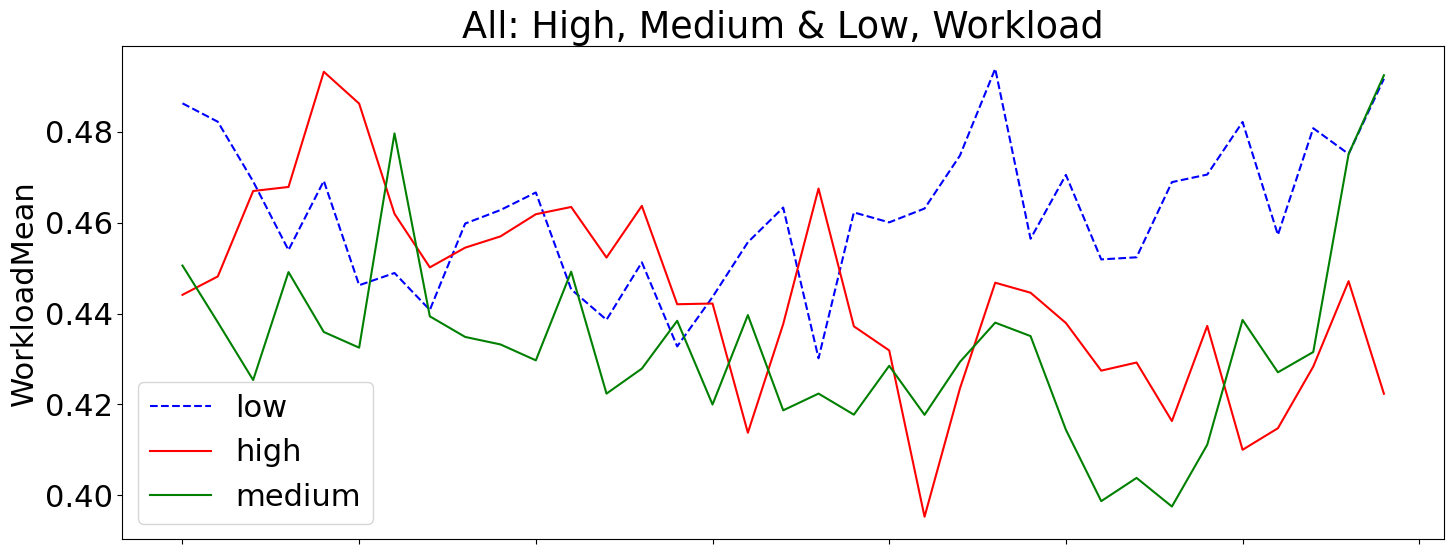

In [38]:
plot_metric(df_low_mean, df_high_mean, df_medium_mean, "WorkloadMean", "Workload_all", "All: High, Medium & Low, Workload")

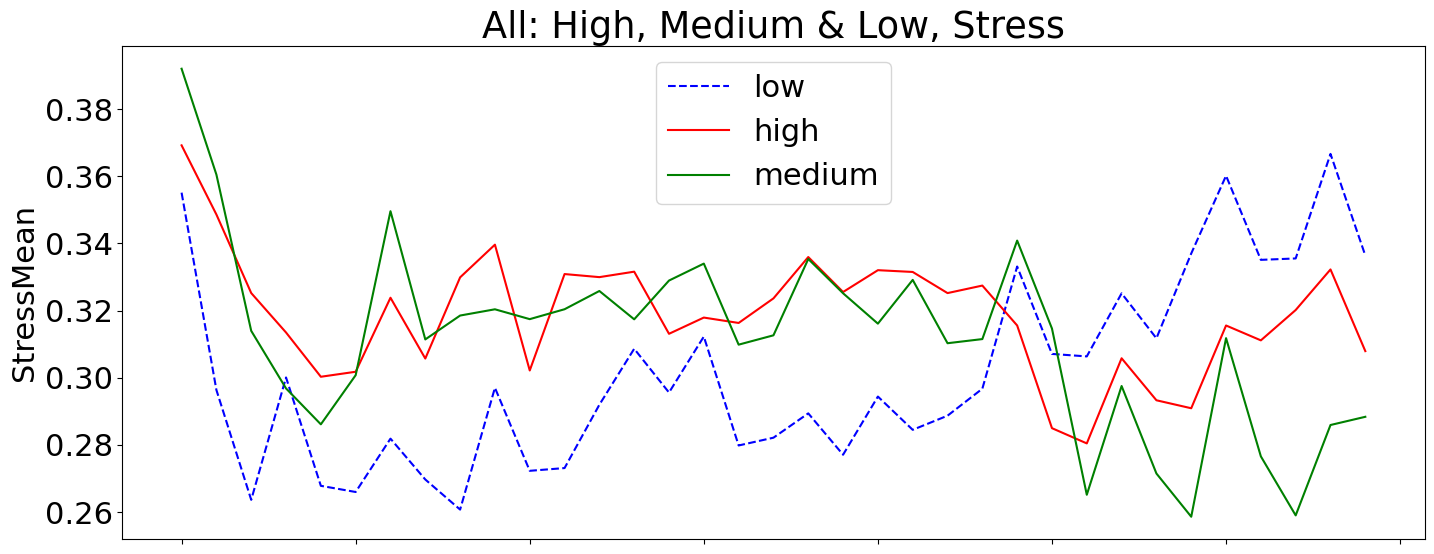

In [40]:
plot_metric(df_low_mean, df_high_mean, df_medium_mean, "StressMean", "Stress_all", "All: High, Medium & Low, Stress")

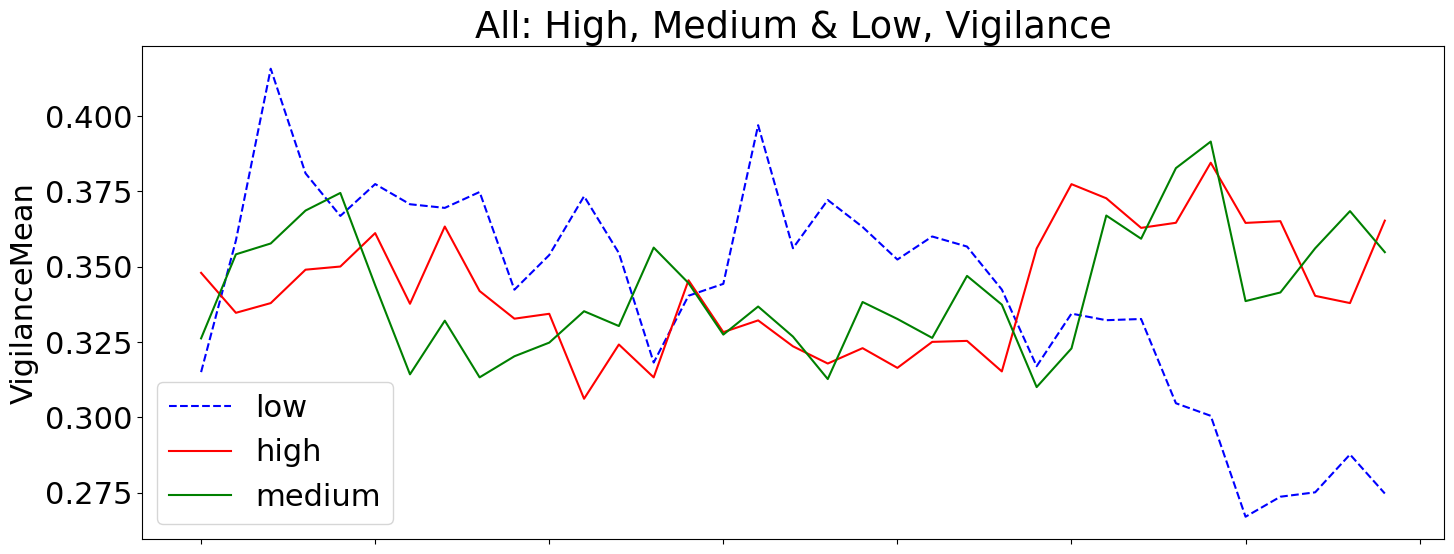

In [41]:
plot_metric(df_low_mean, df_high_mean, df_medium_mean, "VigilanceMean", "Vigilance_all", "All: High, Medium & Low, Vigilance")